In [1]:
from AllStats_0_Utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

# from IPython import display
# display.set_matplotlib_formats('svg')
z_5pc = np.sqrt(2)*sp.special.erfinv(1-0.05)

##  Inference

**7.3.** Generate 100 $\mathcal{N} (0,1)$ observations. Generate a non-parametric $1 - \alpha$ interval band for $F$ by the Dvoretzky-Kiefer-Wolfowitz (DKW) inequality for $\alpha = 0.05$. Repeat using data from a Cauchy distribution.

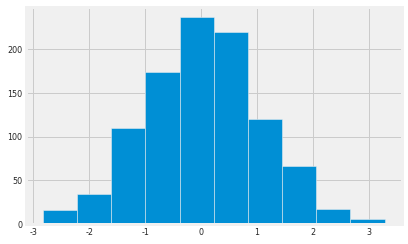

In [2]:
x = np.random.normal(size = 1000)
f = plt.figure(figsize = (6,4))
plt.hist(x)
plt.tick_params(axis = 'x', labelsize = 8)
plt.tick_params(axis = 'y', labelsize = 8);

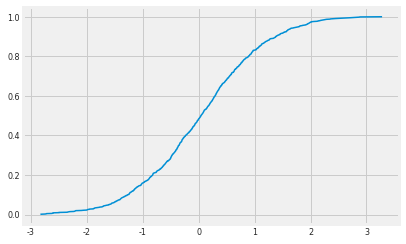

In [3]:
ecdf_data = ECDF(x)
f = plt.figure(figsize = (6,4))
plt.plot(ecdf_data.x, ecdf_data.y)
plt.tick_params(axis = 'x', labelsize = 8)
plt.tick_params(axis = 'y', labelsize = 8);

The DKW inequlity is
$$
\mathbb{P} \biggl( \sup_{x \in \mathbb{R}} | \hat{F}_n(x) - F(x)| \biggr) \leq 2e^{2n \varepsilon^2},
$$
with $\hat{F}_n(x)$ the empirical CDF of $X_1, \ldots, X_n \sim F$ IID:
$$
\hat{F}_n(x) = \frac{1}{n} \sum_{k = 1}^n \mathbb{1}_{(-\infty, x)}(X_k).
$$

In [4]:
nobs = len(ecdf_data.y)
alpha = 0.05
epsilon = np.sqrt(np.log(2./alpha) / (2 * nobs))
lower = np.clip(ecdf_data.y - epsilon, 0, 1)
upper = np.clip(ecdf_data.y + epsilon, 0, 1)

Recall:
$$
\Phi(z) = \frac1{2} + \frac1{2} \mathrm{erf} \Biggl(\frac{z}{\sqrt{2}}\Biggr) 
= \frac1{2} + \frac1{2} \int_0^z e^{-\frac{t}{\sqrt{2}}}dt
$$

In [5]:
cdf_data = 0.5 + 0.5*sp.special.erf(ecdf_data.x/np.sqrt(2))

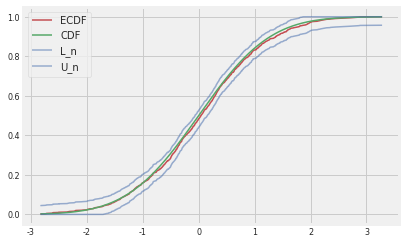

In [6]:
fig = plt.figure(figsize=(6,4))
plt.plot(ecdf_data.x, ecdf_data.y, label = 'ECDF',  c = 'r')
plt.plot(ecdf_data.x, cdf_data, label = 'CDF',  c = 'g') #theoretical N(0,1)
plt.plot(ecdf_data.x, lower, label = 'L_n', color = 'b', alpha = 0.55)
plt.plot(ecdf_data.x, upper, label = 'U_n', color = 'b', alpha = 0.55)
plt.tick_params(axis = 'x', labelsize = 8)
plt.tick_params(axis = 'y', labelsize = 8)
plt.legend(loc = 0, fontsize = 10);

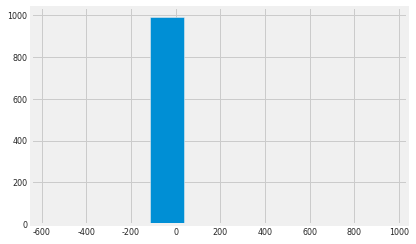

In [7]:
x = sp.stats.cauchy.rvs(size=1000)
f = plt.figure(figsize = (6,4))
plt.hist(x)
plt.tick_params(axis = 'x', labelsize = 8)
plt.tick_params(axis = 'y', labelsize = 8);

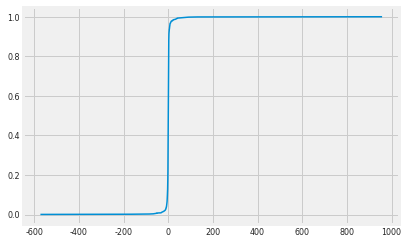

In [8]:
ecdf_data = ECDF(x)
f = plt.figure(figsize = (6,4))
plt.plot(ecdf_data.x, ecdf_data.y)
plt.tick_params(axis = 'x', labelsize = 8)
plt.tick_params(axis = 'y', labelsize = 8);

In [9]:
nobs = len(ecdf_data.y)
alpha = 0.05
epsilon = np.sqrt(np.log(2./alpha) / (2 * nobs))
lower = np.clip(ecdf_data.y - epsilon, 0, 1)
upper = np.clip(ecdf_data.y + epsilon, 0, 1)

cdf_data = sp.stats.cauchy.cdf(ecdf_data.x)

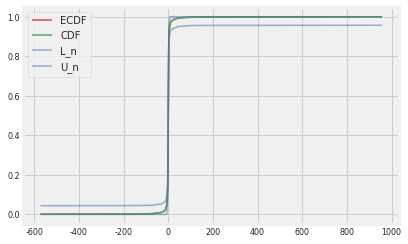

In [10]:
fig = plt.figure(figsize=(6,4))
plt.plot(ecdf_data.x, ecdf_data.y, label = 'ECDF',  c = 'r')
plt.plot(ecdf_data.x, cdf_data, label = 'CDF',  c = 'g') #theoretical Cauchy
plt.plot(ecdf_data.x, lower, label = 'L_n', color = 'b', alpha = 0.55)
plt.plot(ecdf_data.x, upper, label = 'U_n', color = 'b', alpha = 0.55)
plt.tick_params(axis = 'x', labelsize = 8)
plt.tick_params(axis = 'y', labelsize = 8)
plt.legend(loc = 0, fontsize = 10);

Hoy interp1d works?

In [11]:
# interp1d?

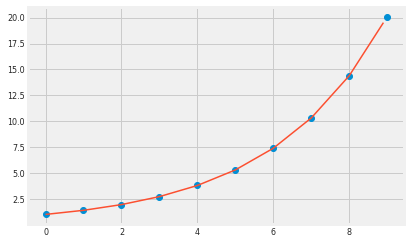

In [12]:
t = np.arange(0, 10)
y = np.exp(t/3.0)
f = interp1d(t, y)

tnew = np.arange(0, 9, 0.1)
ynew = f(tnew)   # use interpolation function returned by `interp1d`
plt.plot(t, y, 'o', tnew, ynew, '-')
plt.tick_params(axis = 'x', labelsize = 8)
plt.tick_params(axis = 'y', labelsize = 8);

**7.7.** Estimate the CDF $F(x)$ of the magnitudes of earthquakes near Fiji. Compute and plot a 95 percent confidence envelope for $F$. Find an approximate 95 percent confidence interval for $F(4.9) − F (4.3)$.

In [13]:
fiji = pd.read_csv('fijiquakes.dat', sep = ',')
fiji.shape

(1000, 6)

In [14]:
fiji.head()

,Obs.,lat,long,depth,mag,stations
0,1,-20.42,181.62,562,4.8,41
1,2,-20.62,181.03,650,4.2,15
2,3,-26.00,184.10,42,5.4,43
3,4,-17.97,181.66,626,4.1,19
4,5,-20.42,181.96,649,4.0,11


In [15]:
cdf_mag = ECDF(fiji['mag'])
nobs = len(cdf_mag.y)
alpha = 0.05
epsilon = np.sqrt(np.log(2./alpha) / (2 * nobs))
lower = np.clip(cdf_mag.y - epsilon, 0, 1)
upper = np.clip(cdf_mag.y + epsilon, 0, 1)

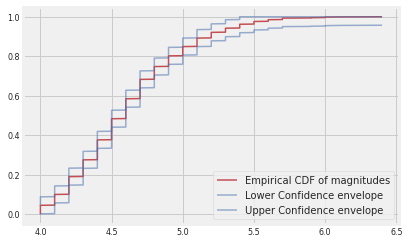

In [16]:
f = plt.figure(figsize=(6,4))
plt.plot(cdf_mag.x, cdf_mag.y, label = 'Empirical CDF of magnitudes',  c = 'r')
plt.plot(cdf_mag.x, lower, label = 'Lower Confidence envelope', color = 'b', alpha = 0.55)
plt.plot(cdf_mag.x, upper, label = 'Upper Confidence envelope', color = 'b', alpha = 0.55)
plt.tick_params(axis = 'x', labelsize = 8)
plt.tick_params(axis = 'y', labelsize = 8)
plt.legend(loc = 0, fontsize = 10);

From excersice 7.4.6 we have that:
$$
\widehat{\theta} = \widehat{F_n}(b) - \widehat{F_n}(a),
$$
which is computed as an array. Thus the estimate is:

In [17]:
Fhatb = np.median(cdf_mag.y[cdf_mag.x == 4.9])
Fhata = np.median(cdf_mag.y[cdf_mag.x == 4.3])
fiji_stat =  Fhatb - Fhata
fiji_stat

0.5415000000000001

The estimated standard error is:
$$
\Biggl(\frac1{n} \Bigl(  \widehat{F_n}(b)\bigl(1 - \widehat{F_n}(b)\bigr) + 
\widehat{F_n}(a)\bigl(1 - \widehat{F_n}(a)\bigr) \Bigr) \Biggr)^{1/2}
$$

In [18]:
se_fiji = np.sqrt(fiji.shape[0]**(-1)*(Fhatb*(1 - Fhatb)  + Fhata*(1 - Fhata)))
se_fiji

0.01879743998527459

If 
$$
g(x) = a + bf(cx) = (\tau_a \circ m_b \circ f \circ m_c) (x),
$$
then
$$
g^{-1}(y) = (m_{c^{-1}} \circ f^{-1} \circ m_{b^{-1}} \circ \tau_{-a})(y) = c^{-1}f^{-1} \bigl( b^{-1}(y - a)\bigr).
$$
Thus,
$$
\Phi^{-1}(a) = \sqrt{2}\,\mathrm{erf}^{-1}(2a - 1)
$$
and
$$
z_{\alpha/2} = \Phi^{-1}(1 - \alpha/2) = \sqrt{2}\,\mathrm{erf}^{-1}(1 - \alpha).
$$

In [19]:
z_5pc = np.sqrt(2)*sp.special.erfinv(1-0.05)
z_5pc

1.959963984540054

In [20]:
inte_len = z_5pc*se_fiji
[fiji_stat - inte_len, fiji_stat + inte_len]

[0.5046576946273088, 0.5783423053726914]

**7.8.** Get the data on eruption times and waiting times between eruptions of the Old Faithful geyser. Estimate the mean waiting time and give a standard error for the estimate. Also, give a 90 percent confidence interval for the mean waiting time. Now estimate the median waiting time.

In [23]:
faithful = pd.read_csv('faithful.dat', sep = ',')
faithful.shape

(272, 2)

In [24]:
faithful.head()

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


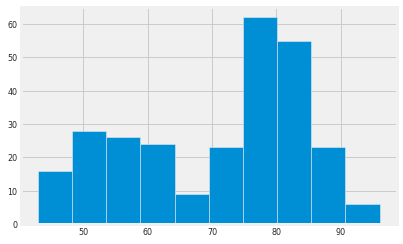

In [25]:
f = plt.figure(figsize=(6,4))
plt.hist(faithful['waiting'])
plt.tick_params(axis = 'x', labelsize = 8)
plt.tick_params(axis = 'y', labelsize = 8);

In [26]:
waiting_mean = faithful['waiting'].mean()
waiting_mean

70.8970588235294

Numpy gives the biased standard deviation.

In [27]:
waiting_se = faithful['waiting'].std()/np.sqrt(faithful.shape[0])
[waiting_mean - z_5pc*waiting_se, waiting_mean + 1.96*z_5pc]

[69.28142843356255, 74.73858823322792]

In [28]:
waiting_ecdf = ECDF(faithful['waiting'])

In [29]:
int(waiting_ecdf.x[waiting_ecdf.y == 0.5])

76

In [30]:
faithful['waiting'].median()

76.0

**7.10.** In 1975, an experiment was conducted to see if cloud seeding produced
rainfall. 26 clouds were seeded with silver nitrate and 26 were not. The
decision to seed or not was made at random. Let $\theta$ be the difference in the mean precipitation from the two groups. Estimate  $\theta$. Estimate the standard error of the estimate and produce a 95 percent confidence interval.

In [17]:
clouds = pd.read_csv('clouds.dat', sep = ',')
n = clouds.shape[0]
clouds.shape

(26, 2)

In [18]:
clouds.head()

,Unseeded_Clouds,Seeded_Clouds
0,1202.6,2745.6
1,830.1,1697.8
2,372.4,1656.0
3,345.5,978.0
4,321.2,703.4


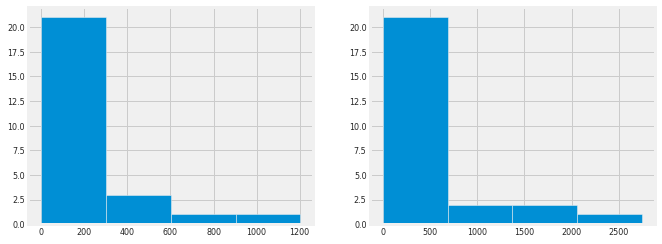

In [19]:
fig, axes = plt.subplots(figsize=(10,4), nrows=1, ncols=2)
axes[0].hist(clouds['Unseeded_Clouds'], bins = 4)
axes[0].tick_params(axis = 'x', labelsize = 8)
axes[0].tick_params(axis = 'y', labelsize = 8)
axes[1].hist(clouds['Seeded_Clouds'], bins = 4)
axes[1].tick_params(axis = 'x', labelsize = 8)
axes[1].tick_params(axis = 'y', labelsize = 8);

In [20]:
s_mean = clouds['Seeded_Clouds'].mean()
uns_mean = clouds['Unseeded_Clouds'].mean()
cloud_meandiff = s_mean - uns_mean
cloud_meandiff

277.39615384615394

$$
\widehat{\mathrm{se}}( \overline{X}_n - \overline{Y}_n) = \sqrt{\frac1{n}\bigl(\widehat{\sigma}_X^2 + \widehat{\sigma}_Y^2\bigr)}
$$

In [21]:
cloud_se = np.sqrt(1/n*(clouds['Seeded_Clouds'].std()**2 + clouds['Unseeded_Clouds'].std()**2))
[cloud_meandiff - z_5pc*cloud_se, cloud_meandiff + z_5pc*cloud_se]

[5.314115765120391, 549.4781919271875]

In [22]:
cloud_se

138.81991721642947